# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/LoanDefaultDataset.csv


---

# Change working directory

We need to change the working directory from its current folder, where the notebook is stored, to its parent folder
* First we access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\kathr\\Nextcloud\\Dokumente\\Karriere\\Projekte\\vscode-projects\\PP5\\LoanGuard\\jupyter_notebooks'

* Then we want to make the parent of the current directory the new current directory
    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(f"You set a new current directory: {current_dir}")

You set a new current directory: c:\Users\kathr\Nextcloud\Dokumente\Karriere\Projekte\vscode-projects\PP5\LoanGuard


---

# Fetch data from Kaggle

Install Kaggle package to fetch data

In [ ]:
#%pip install kaggle==1.7.4.5

In order to authenticate Kaggle to download data in this session, your **authentication token (JSON file)** from Kaggle needs to be stored in the main project repository.
* In case you don't have your token yet, please refer to the [Kaggle Documentation](https://www.kaggle.com/docs/api)


Once you dropped your `kaggle.json` file in the main working directory, run the cell below, so the token is recognized in the session.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
#! chmod 600 kaggle.json

This project uses the [Loan Default Prediction Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default).

Define the Kaggle dataset, and destination folder and download it.

In [ ]:
# KaggleDatasetPath = "nikhil1e9/loan-default"
KaggleDatasetPath = "laotse/credit-risk-dataset"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip the downloaded file, delete the zip file and delete the kaggle.json file

In [ ]:
import zipfile
import glob

# Find all zip files in the folder
zip_files = glob.glob(os.path.join(DestinationFolder, "*.zip"))

# Extract each zip file and then delete it
for zip_path in zip_files:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(DestinationFolder)
    os.remove(zip_path)  # remove the zip after extracting

# Optionally, remove kaggle.json if it exists
kaggle_json = os.path.join(os.getcwd(), "kaggle.json")
if os.path.exists(kaggle_json):
    os.remove(kaggle_json)

print("All ZIP files extracted and deleted.")

---

# Load and Inspect Kaggle data

In [3]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/credit_risk_dataset.csv")
print(df.shape)
df.head()

(32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


* The Dataset contains 32581 rows and 12 columns

### Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


The dataset consists of 12 variables, including 8 numerical and 4 categorical features. All data types are correctly assigned:

- **Numerical variables** (e.g., `person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`) are stored as either `int64` or `float64`.  
- **Categorical variables** (e.g., `person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file`) are stored as `object` type.  
- **Target variable** `loan_status` is numerical (`int64`), where `0` represents non-default and `1` represents default.

This indicates that the dataset is **properly typed**, with no immediate data type conversions required before preprocessing.


### Missing Values

In [6]:
print("Number of missing values in each column:")

missing_count = df.isna().sum()
missing_percent = (df.isna().sum() / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent.round(2)
})

print(missing_data)

print("\nTotal number of missing values in the dataframe:", df.isna().sum().sum())

Number of missing values in each column:
                            Missing Values  Percentage
person_age                               0        0.00
person_income                            0        0.00
person_home_ownership                    0        0.00
person_emp_length                      895        2.75
loan_intent                              0        0.00
loan_grade                               0        0.00
loan_amnt                                0        0.00
loan_int_rate                         3116        9.56
loan_status                              0        0.00
loan_percent_income                      0        0.00
cb_person_default_on_file                0        0.00
cb_person_cred_hist_length               0        0.00

Total number of missing values in the dataframe: 4011


* The dataset contains minimal missing values overall, with only two variables affected:
    - `person_emp_length` has **895 missing values** (2.75% of records)  
    - `loan_int_rate` has **3,116 missing values** (9.56% of records)  

* All other variables are complete with no missing entries 
* The proportion of missing data is relatively low, indicating good data quality
* Appropriate imputation strategies (such as median or model-based imputation) should be applied to `person_emp_length` and `loan_int_rate` during preprocessing to preserve dataset integrity

### Summary Statistics

Numerical

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.73,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.79,4.14,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.01,3.24,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.80,4.06,2.00,3.00,4.00,8.00,30.00


Categorical

In [8]:
df.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [9]:

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file: ['Y' 'N']


* Summary statistics were generated for all variables:

    - For **numerical features**, metrics such as `mean`, `std`, `min`, and `max` were reviewed to identify potential outliers or inconsistencies
    - For **categorical features**, counts and most frequent categories were inspected to understand variable diversity and dominant groups

* Additionally, we examined the distinct values within each categorical variable to ensure that all entries are reasonable and align with expected categories

* Overall, this provides a comprehensive first look at both numerical and categorical distributions in the dataset.  
    While most variables fall within expected ranges, several numerical features — particularly `person_age`, `person_emp_length` and `person_income` — exhibit unusually high maximum values, suggesting the presence of potential outliers that should be examined or treated during preprocessing to ensure model robustness and reliability.  
    No unexpected categories or apparent data entry errors are observed, indicating these features are **clean and ready for encoding** in preprocessing.

### Duplicated Entries

In [ ]:
duplicates = df.duplicated()
df[df.duplicated(keep=False)].sort_values(by=['person_age','person_income'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [26]:
num_duplicates = duplicates.sum()
percent_duplicates = (num_duplicates / len(df)) * 100
print(f"Number of duplicate rows: {num_duplicates} ({percent_duplicates:.2f}%)")

Number of duplicate rows: 165 (0.51%)


* To ensure data integrity, the dataset was checked for duplicated rows across all features.  
  A total of **165 duplicate rows** were identified, likely due to the fact that this is an artificially created dataset.  
* As it is highly unlikely for two borrowers to have identical values for all features, these duplicates should be removed.  
  They represent **less than 1% of the dataset**, so dropping them will not significantly reduce the data size.


### Target Variable Exploration

The target variable **`loan_status`** indicates whether a borrower has defaulted on their loan (`1`) or not (`0`).  

The class distribution is examined to understand the balance between default and non-default cases.


In [27]:
print("Distribution of Loan Defaults:")

pd.DataFrame({
    'Count': df['loan_status'].value_counts(),
    'Percentage (%)': round(df['loan_status'].value_counts(normalize=True) * 100, 2)
})

Distribution of Loan Defaults:


,Count,Percentage (%)
loan_status,,
0,25473,78.18
1,7108,21.82


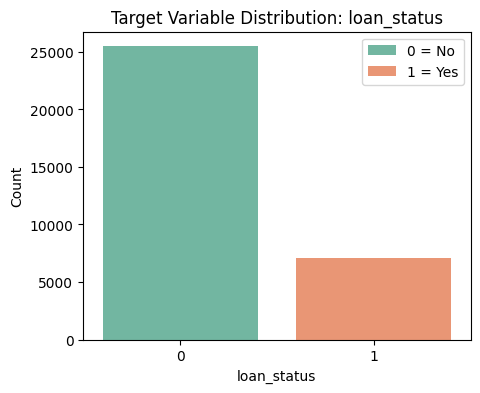

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x='loan_status', data=df, hue= "loan_status", palette='Set2')
plt.title('Target Variable Distribution: loan_status')
plt.ylabel('Count')
plt.legend(labels=['0 = No', '1 = Yes']) 
plt.show()



- The target variable shows a **highly imbalanced** distribution.  
- This is important because **imbalanced target classes** can bias models toward the majority class. We will have to perform oversampling in order to increase the representation of the minority class before training a model.

At this stage, no transformation is applied yet, as the goal is to understand the target before data cleaning and modeling.

---

# Push files to Repo

In [ ]:
import os

file_path = f'outputs/datasets/collection'
variable_to_save = df
filename = "LoanDefaultData.csv"

# Try to generate output folder
try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

# Save the dataset as csv file for further use
variable_to_save.to_csv(f"{file_path}/{filename}", index=False)


---

# Conclusions and Next Steps

The dataset appears well-structured and mostly complete. Numerical variables are correctly typed, although a few features (`person_age`, `person_emp_length`, `person_income`) exhibit unusually high maximum values, suggesting potential outliers that should be addressed during preprocessing. Categorical variables are stored as objects, and all observed categories are reasonable and consistent with expectations. Summary statistics indicate that the target variable `loan_status` is imbalanced but suitable for modeling. The dataset was checked for duplicated rows across all features, revealing **165 duplicates** (less than 1% of the data) likely due to the artificial nature of the dataset; these will be removed to maintain data integrity. Minimal missing values exist only in `person_emp_length` and `loan_int_rate`, which can be imputed during preprocessing.


Next Steps:
* Conduct exploratory data analysis (EDA): visualize univariate distributions and relationships between features and the target variable, to answer Business Requirement 1